In [51]:
import pandas as pd

# Provide the path to your CSV file
file_path = 'data/Book1.xlsx - Sheet2 (1).csv'

# Read the CSV file
df = pd.read_csv(file_path, header=1)

# Display the first few rows of the dataset
df.head()

df = df.drop(columns=['Treatment condition', 'Chemical used', 'Hypothesis for cause of cell death'])

df

,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive
0,0,0,568.0,645.0,1213.0,1,0,0,0,7.16,156,449
1,35,0,252.0,952.0,1204.0,0,1,1,0,31.03,41,525
2,0,35,594.0,775.0,1369.0,0,0,0,1,22.76,151,456
3,35,35,328.0,1264.0,1592.0,0,1,1,1,39.04,48,440
4,0,0,848.0,223.0,1071.0,1,0,0,0,7.21,89,563
5,35,0,186.0,1167.0,1353.0,0,1,1,0,20.51,67,420
6,0,35,594.0,775.0,1369.0,0,0,0,1,30.74,65,774
7,35,35,358.0,1282.0,1640.0,0,1,1,1,41.54,31,429
8,0,0,322.0,357.0,679.0,1,0,0,0,13.95,98,363
9,35,0,104.0,733.0,837.0,0,1,1,0,25.21,84,429


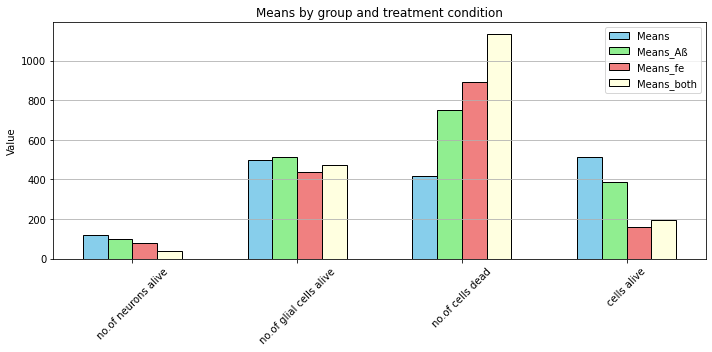

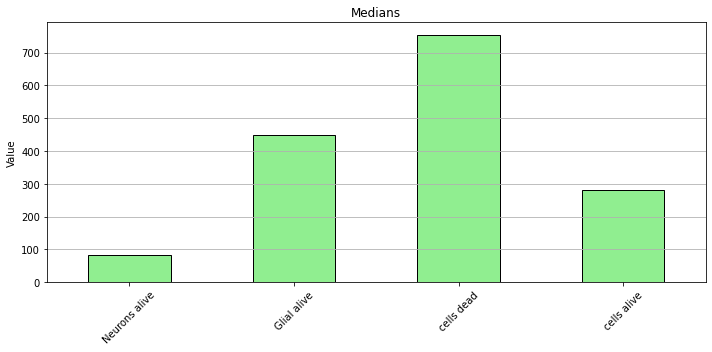

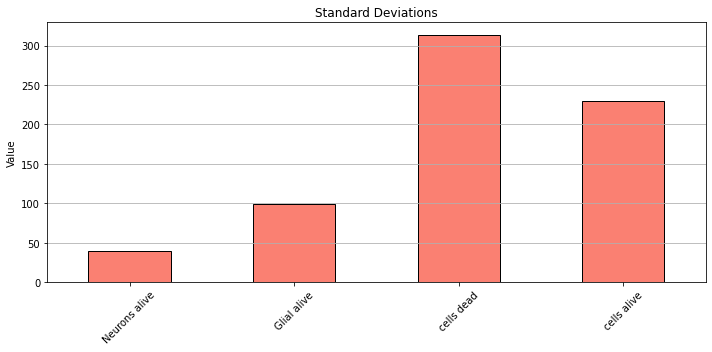

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_control = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] == 0)]
df_Aß = df[(df['Concentration/Ferric citrate'] == 0) & (df['Concentration/Aß 1-42'] != 0)]
df_fe = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] == 0)]
df_both = df[(df['Concentration/Ferric citrate'] != 0) & (df['Concentration/Aß 1-42'] != 0)]


means = df_control[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].mean()
means_Aß = df_Aß[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].mean()
means_fe = df_fe[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].mean()
means_both = df_both[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].mean()

medians = df[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].median()
std_devs = df[['Neurons alive', 'Glial alive', 'cells dead', 'cells alive']].std()

# Plot means
labels = ['no.of neurons alive', 'no.of glial cells alive', 'no.of cells dead', 'cells alive']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width*1.5, means, width, label='Means', color='skyblue', edgecolor='black')
rects2 = ax.bar(x - width*0.5, means_Aß, width, label='Means_Aß', color='lightgreen', edgecolor='black')
rects3 = ax.bar(x + width*0.5, means_fe, width, label='Means_fe', color='lightcoral', edgecolor='black')
rects4 = ax.bar(x + width*1.5, means_both, width, label='Means_both', color='lightyellow', edgecolor='black') 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Means by group and treatment condition')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot medians
plt.figure(figsize=(10, 5))
medians.plot(kind='bar', color='lightgreen', edgecolor='black', title='Medians')
plt.ylabel('Value')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot standard deviations
plt.figure(figsize=(10, 5))
std_devs.plot(kind='bar', color='salmon', edgecolor='black', title='Standard Deviations')
plt.ylabel('Value')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

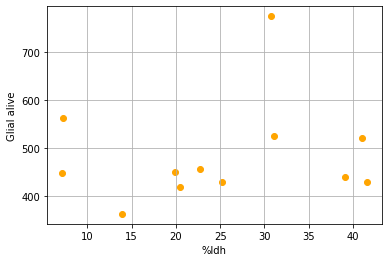

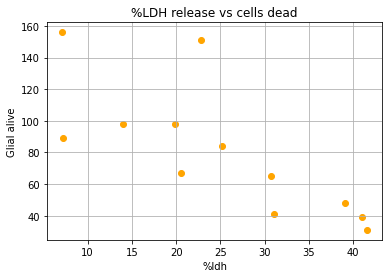

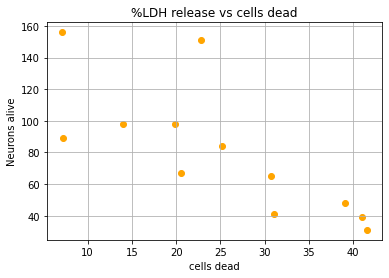

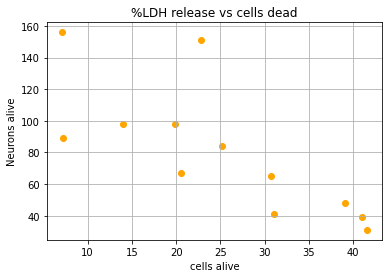

In [53]:


plt.scatter(df['%ldh'], df['Glial alive'], color='orange')
plt.xlabel('%ldh')
plt.ylabel('Glial alive')
#plt.title('%LDH release vs cells dead')
plt.grid(True)
plt.show()

plt.scatter(df['%ldh'], df['Neurons alive'], color='orange')
plt.xlabel('%ldh')
plt.ylabel('Glial alive')
plt.title('%LDH release vs cells dead')
plt.grid(True)
plt.show()

plt.scatter(df['%ldh'], df['Neurons alive'], color='orange')
plt.xlabel('cells dead')
plt.ylabel('Neurons alive')
plt.title('%LDH release vs cells dead')
plt.grid(True)
plt.show()



plt.scatter(df['%ldh'], df['Neurons alive'], color='orange')
plt.xlabel('cells alive')
plt.ylabel('Neurons alive')
plt.title('%LDH release vs cells dead')
plt.grid(True)
plt.show()

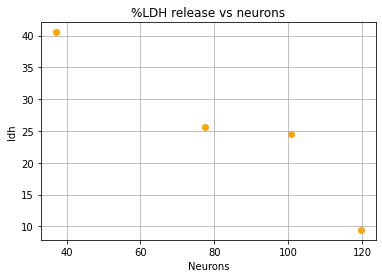

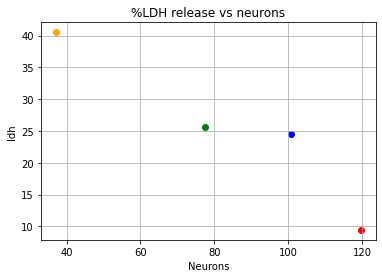

In [54]:
neurons_mean = [df_control['Neurons alive'].mean(), df_Aß['Neurons alive'].mean(), df_fe['Neurons alive'].mean(), df_both['Neurons alive'].mean()],
ldh_mean = [df_control['%ldh'].mean(), df_Aß['%ldh'].mean(), df_fe['%ldh'].mean(), df_both['%ldh'].mean()]

plt.scatter(neurons_mean, ldh_mean, color='orange')
plt.xlabel('Neurons')
plt.ylabel('ldh')
plt.title('%LDH release vs neurons')
plt.grid(True)
plt.show()

plt.scatter(df_control['Neurons alive'].mean(), df_control['%ldh'].mean(), color='red')
plt.scatter(df_Aß['Neurons alive'].mean(), df_Aß['%ldh'].mean(), color='blue')
plt.scatter(df_fe['Neurons alive'].mean(), df_fe['%ldh'].mean(), color='green')
plt.scatter(df_both['Neurons alive'].mean(), df_both['%ldh'].mean(), color='orange')
plt.xlabel('Neurons')
plt.ylabel('ldh')
plt.title('%LDH release vs neurons')
plt.grid(True)
plt.show()
